Plotting selection

In [55]:
library(dplyr)
library(ggplot2)

In [56]:
plot_selection <- function(pop_sele_file, pop){
    
    relate <- read.table(pop_sele_file, header=1)
    
    relate$p.val <- ifelse(-relate$when_mutation_has_freq2 <= -log10(0.0005), 0,
                                      ifelse(-relate$when_mutation_has_freq2 <= -log10(0.0001), 1, 2))
    
    plot_name <- paste(pop, ".pdf", sep="")
    
    ggplot(relate, aes(x=pos, y=-when_mutation_has_freq2,  colour = factor(p.val))) + 
    geom_point() +
    labs(x = "Position", y="-log10 p value for selection") +
    geom_hline(yintercept = -log10(0.0005), linetype = "longdash", color="#DC3220") +
    geom_hline(yintercept = -log10(0.0001), linetype = "longdash", color="#DC3220") +
    scale_colour_manual(values = c("#000000", "#882255", "#CC6677")) +
    ylim(0,6) +
    ylab("-log 10 p-value") +
    xlab("Position") +
    theme(legend.position="none")
    
    ggsave(plot_name,
       plot = last_plot(),
       path = "../step2/plots",
       device = "pdf",
       dpi = 300,
       units = "cm",
       width = 20,
       height = 10)
}



In [57]:
#test
plot_selection("../step2/ESN/ESN_chr3_relate_selection.sele", "ESN")

Warning message:
“Removed 9556 rows containing missing values (`geom_point()`).”


In [58]:
get_pos <- function(pop_sele_file){
    relate <- read.table(pop_sele_file, header=1)
    sele <- relate  %>% filter(-when_mutation_has_freq2 >= -log10(0.0001))
    return(sele$pos)
}

In [59]:
files <- c("../step2/ESN/ESN_chr3_relate_selection.sele",
          "../step2/GWD/GWD_chr3_relate_selection.sele",
          "../step2/LWK/LWK_chr3_relate_selection.sele",
          "../step2/MSL/MSL_chr3_relate_selection.sele",
          "../step2/YRI/YRI_chr3_relate_selection.sele")

In [60]:
selection_pos <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(selection_pos) <- c('population', 'selection_position')

for(i in 1:5) {
  sele_file <- files[i]
    pop <- substr(sele_file, 10, 12)
    plot_selection(sele_file, pop)
    positions <- get_pos(sele_file)
    for(i in 1:length(positions)) {
        selection_pos[nrow(selection_pos) + 1,] = c(pop,positions[i])
    }
}

head(selection_pos)

write.csv(selection_pos, "../step2/selection_pos.csv", row.names=FALSE)

Warning message:
“Removed 9556 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12030 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 11983 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 10168 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 9461 rows containing missing values (`geom_point()`).”


,population,selection_position
,<chr>,<chr>
1,ESN,46659530
2,ESN,46741166
3,ESN,50422718
4,ESN,51147807
5,ESN,52063886
6,ESN,53695186


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


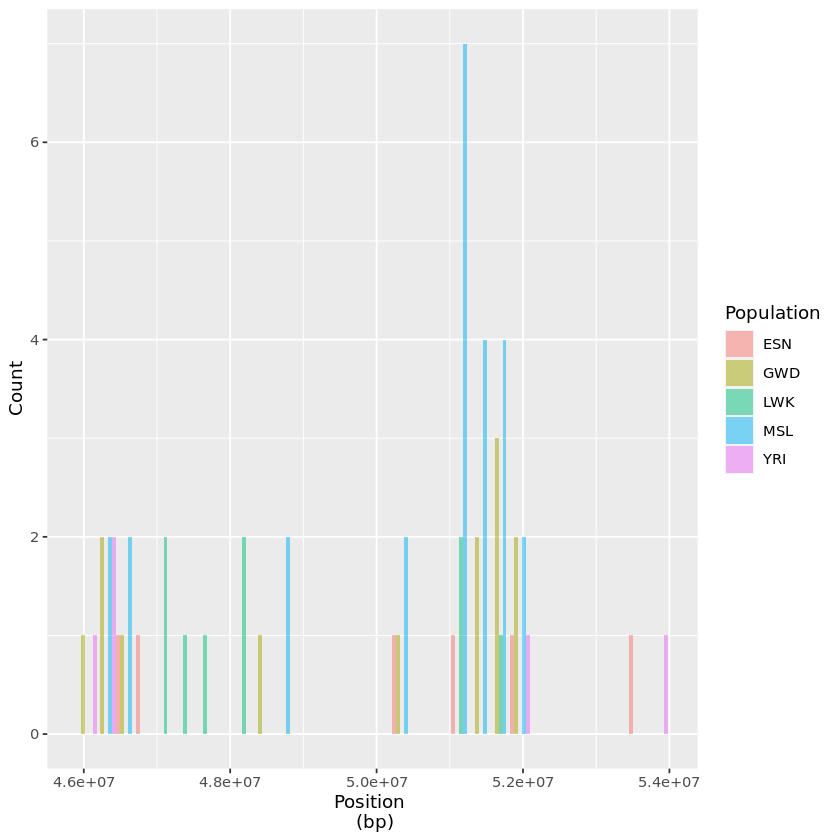

In [63]:
ggplot(selection_pos, aes(x=as.integer(selection_position), fill = factor(population))) +
    geom_histogram(position="dodge", alpha=0.5) +
    xlab("Position \n (bp)") +
    ylab("Count") +
    guides(fill=guide_legend(title="Population"))


ggsave("selection_positions.pdf",
    plot = last_plot(),
    path = "../step2/plots",
    device = "pdf",
    dpi = 300,
    units = "cm",
    width = 20,
    height = 10)